# Map of sub-domain of ANHA12

In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import pickle

%matplotlib inline

#### Parameters:

In [2]:
# domain dimensions:
jmin, jmax = 159, 799
imin, imax = 1139, 2179

# Resolution of grid cells to show in figure:
grid_reso = 10

#### Load files:

In [3]:
mfile    = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mask_Pb-20210729.nc')
mesh_lon = np.array(mfile.variables['nav_lon'])
mesh_lat = np.array(mfile.variables['nav_lat'])
mask     = np.array(mfile.variables['tmask'][0])

In [9]:
folder = '/data/brogalla/run_storage/pb-test_2022-04-02T152603.107669-0400/'
data   = nc.Dataset(f'{folder}ANHA12_EXH006_5d_20020101_20021231_ptrc_T_20020106-20020110.nc')
# imin   = 1099
dpb    = np.ma.masked_where((mask[:,imin:imax,jmin:jmax] == 0), np.array(data.variables['dissolpb'])[0,:,:,:])

print(np.ma.max(dpb), np.ma.min(dpb))

3e-11 0.0


In [10]:
for depth in range(0,50):
    print(f'Max: {depth}, {np.ma.max(dpb[depth,:,:]):.2e}, min: {np.ma.min(dpb[depth,:,:]):.2e}')

Max: 0, 2.21e-11, min: 0.00e+00
Max: 1, 2.21e-11, min: 0.00e+00
Max: 2, 2.21e-11, min: 0.00e+00
Max: 3, 2.21e-11, min: 0.00e+00
Max: 4, 2.21e-11, min: 0.00e+00
Max: 5, 2.21e-11, min: 0.00e+00
Max: 6, 2.21e-11, min: 0.00e+00
Max: 7, 2.21e-11, min: 0.00e+00
Max: 8, 2.21e-11, min: 0.00e+00
Max: 9, 2.21e-11, min: 0.00e+00
Max: 10, 2.21e-11, min: 0.00e+00
Max: 11, 2.21e-11, min: 0.00e+00
Max: 12, 2.21e-11, min: 0.00e+00
Max: 13, 2.21e-11, min: 0.00e+00
Max: 14, 2.21e-11, min: 0.00e+00
Max: 15, 2.21e-11, min: 0.00e+00
Max: 16, 2.21e-11, min: 0.00e+00
Max: 17, 2.21e-11, min: 0.00e+00
Max: 18, 2.21e-11, min: 0.00e+00
Max: 19, 2.21e-11, min: 0.00e+00
Max: 20, 2.21e-11, min: 0.00e+00
Max: 21, 2.21e-11, min: 0.00e+00
Max: 22, 2.21e-11, min: 0.00e+00
Max: 23, 2.22e-11, min: 0.00e+00
Max: 24, 2.22e-11, min: 0.00e+00
Max: 25, 2.22e-11, min: 0.00e+00
Max: 26, 2.29e-11, min: 0.00e+00
Max: 27, 2.42e-11, min: 0.00e+00
Max: 28, 2.52e-11, min: 0.00e+00
Max: 29, 2.75e-11, min: 0.00e+00
Max: 30, 2.91e-11, m

/home/brogalla/miniconda3/envs/julab/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  


#### Figure:

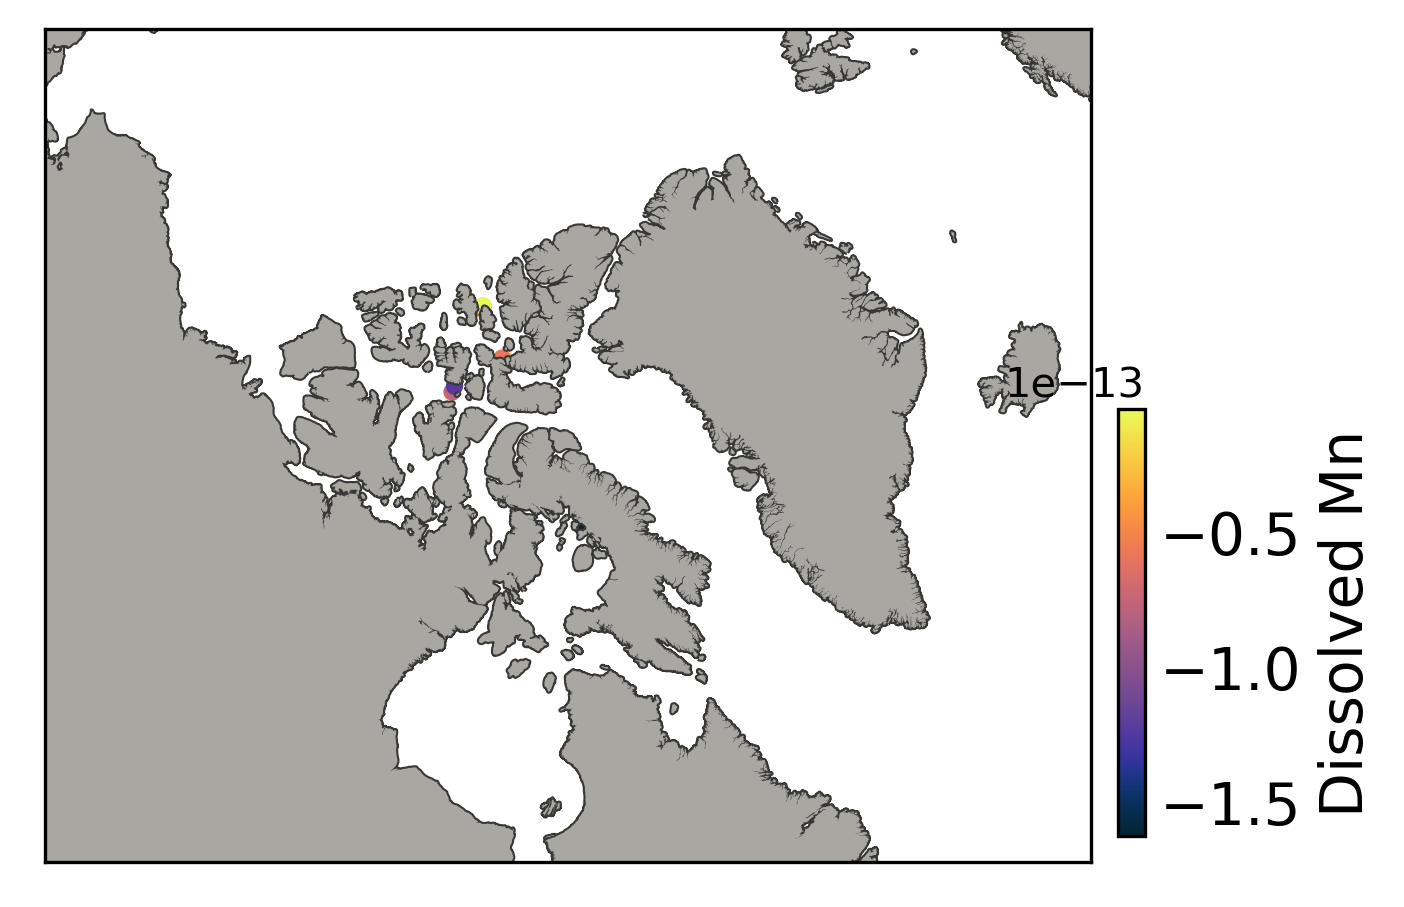

In [15]:
# variable = np.ma.masked_where((dpb[18,:,:] >= 0), dpb[18,:,:])
variable = np.ma.masked_where((dpb[19,:,:] >= 0), dpb[19,:,:])

fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/pb-surface.pickle','rb'))

x, y = proj1(mesh_lon[imin:imax,jmin:jmax], mesh_lat[imin:imax,jmin:jmax]) 
CB = proj1.scatter(x, y, s=10, c=variable, cmap=cmocean.cm.thermal)

# Color bar: --------------------------------------------------------------------------------
cbaxes = fig.add_axes([0.92, 0.155, 0.02, 0.38]);
CBar   = plt.colorbar(CB, ax=ax1, cax=cbaxes); 
CBar.set_label('Dissolved Mn', fontsize=7)
CBar.ax.tick_params(axis='y', length=0, labelsize=7)

In [12]:
def plot_layer(variable, layer):
    
    fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/pb-surface.pickle','rb'))

    x, y = proj1(mesh_lon[imin:imax,jmin:jmax], mesh_lat[imin:imax,jmin:jmax]) 
    CB = proj1.pcolormesh(x, y, variable[layer,:,:], cmap=cmocean.cm.thermal)

    # Color bar: --------------------------------------------------------------------------------
    cbaxes = fig.add_axes([0.92, 0.155, 0.02, 0.38]);
    CBar   = plt.colorbar(CB, ax=ax1, cax=cbaxes); 
    CBar.set_label('Dissolved Mn', fontsize=7)
    CBar.ax.tick_params(axis='y', length=0, labelsize=7)
    
    return

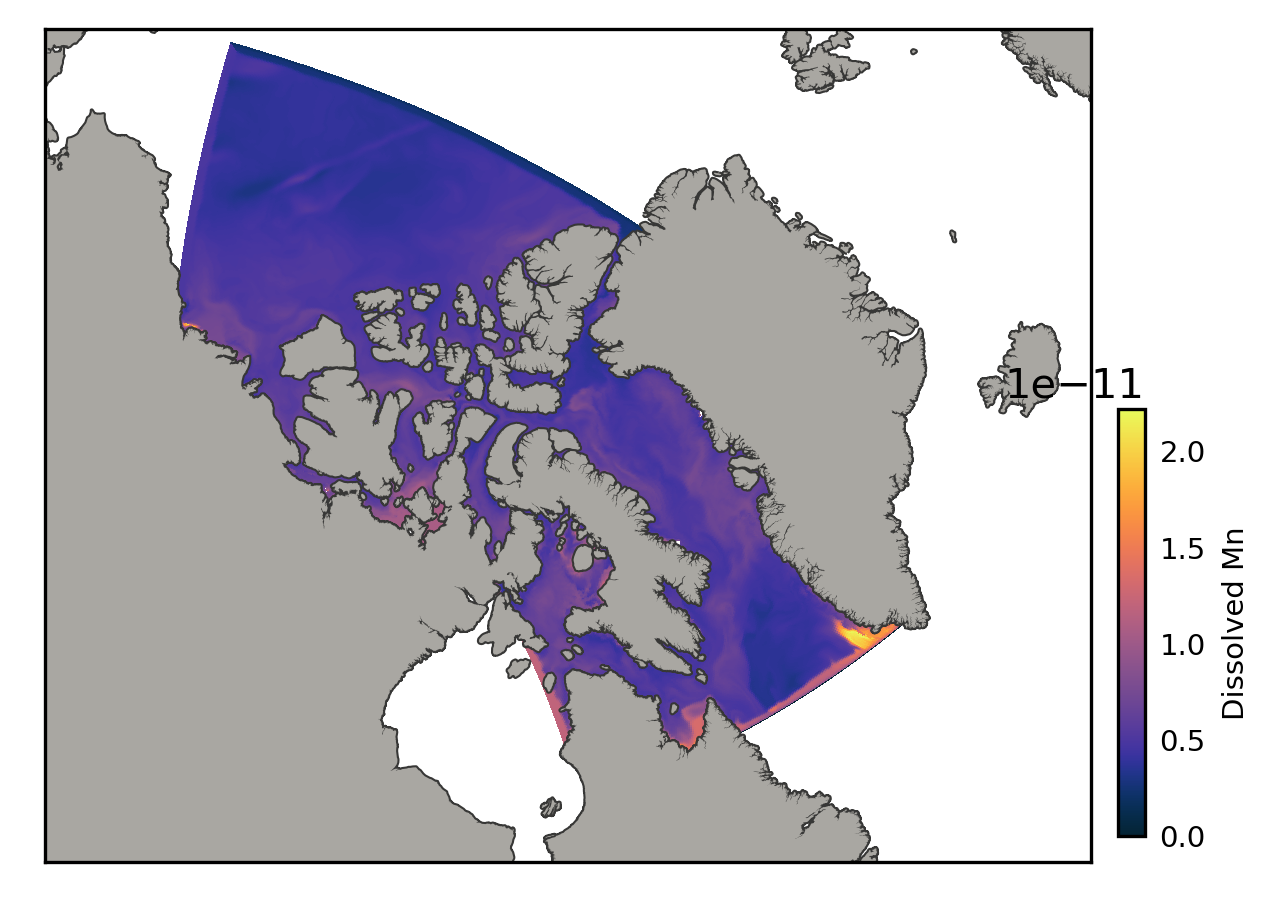

In [13]:
plot_layer(dpb, 0)

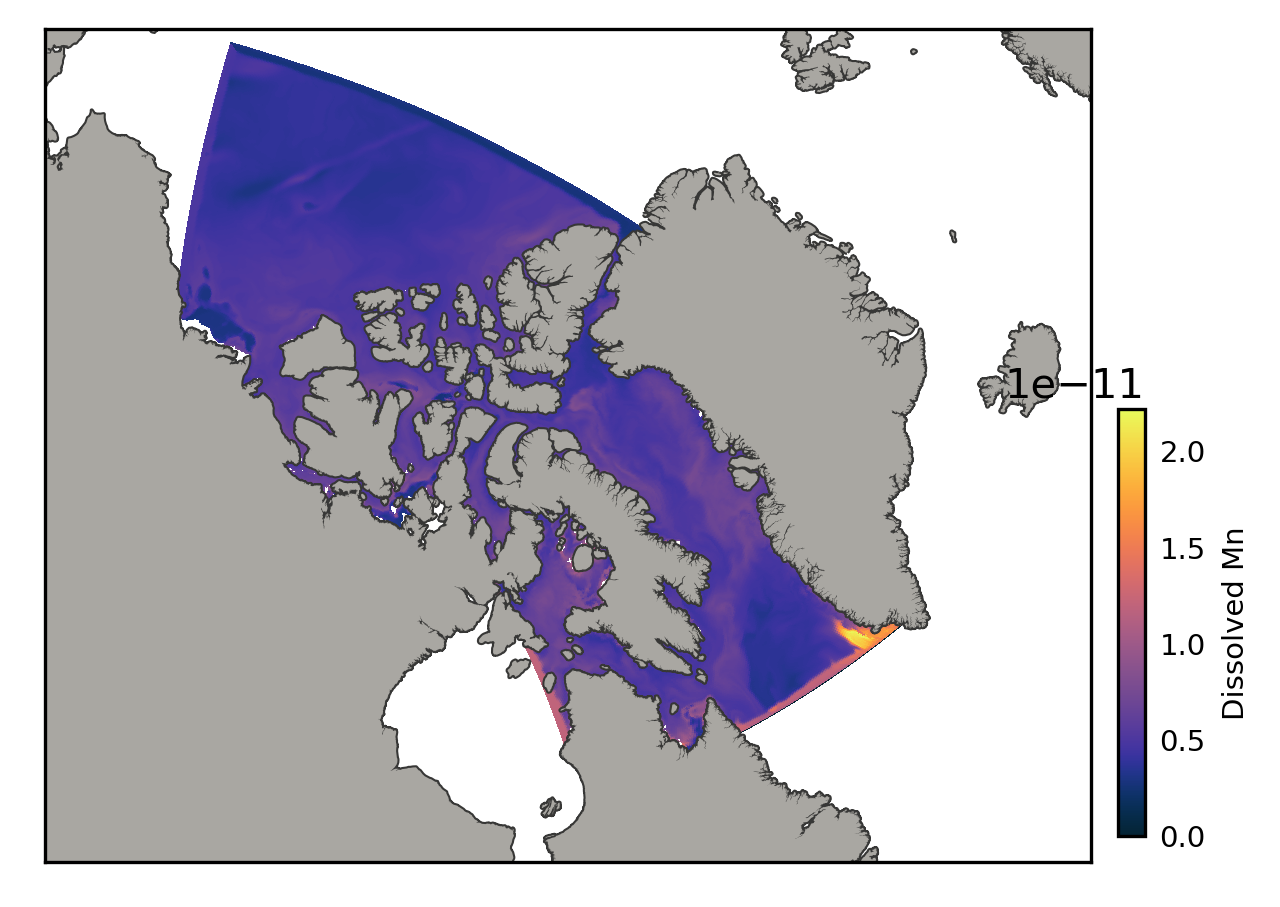

In [14]:
plot_layer(dpb, 10)